In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
bs_results = []
bs_result_path = 'data/bs_result/bs_result_'

for i in range(1, 7):
    dim_result = pd.read_csv(bs_result_path + str(i) + ' (1).csv')
    CIs = np.percentile(dim_result, [2.5, 97.5], axis=0)
    means = np.mean(dim_result, axis=0)
    bs_result = pd.DataFrame({'mean': means, 'lower': CIs[0], 'upper': CIs[1]})
    bs_results.append(bs_result)

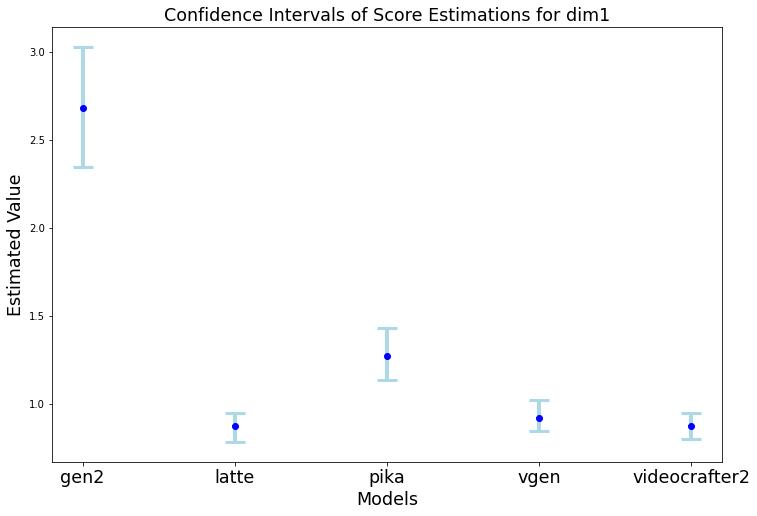

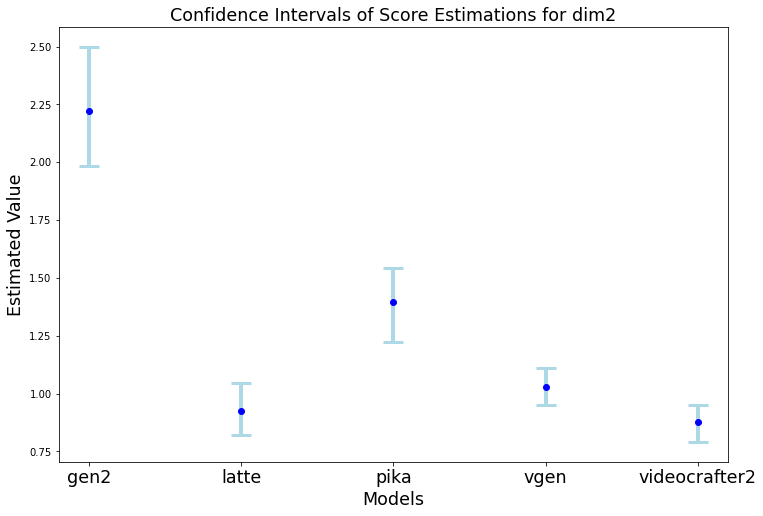

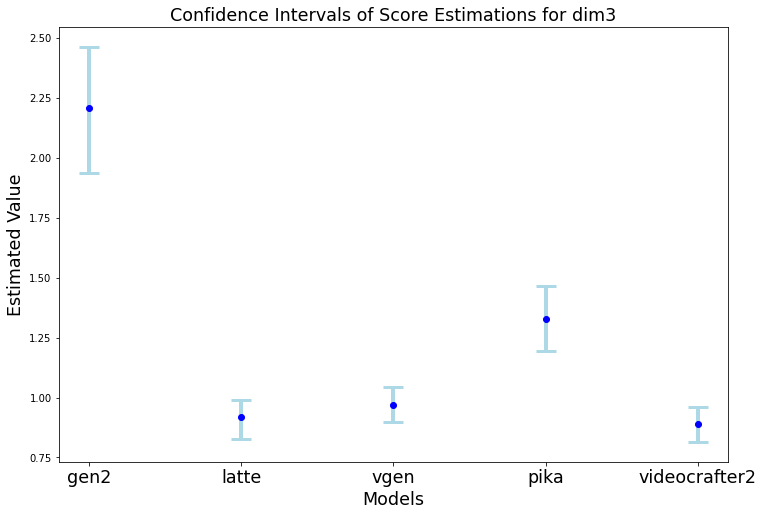

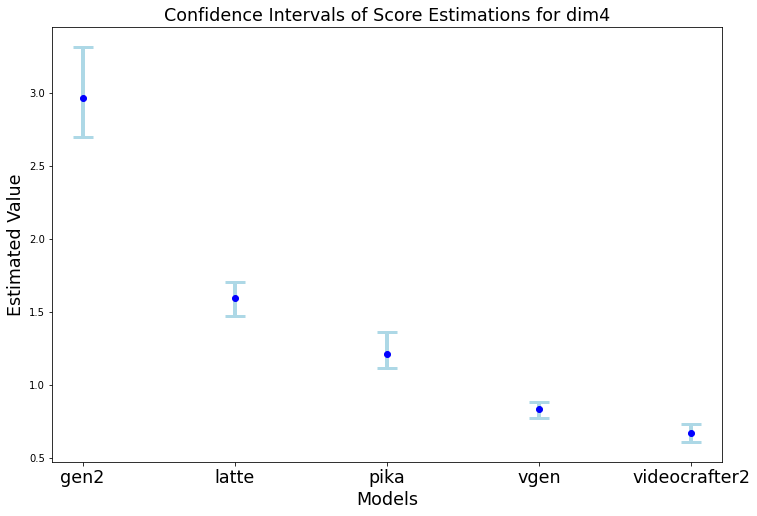

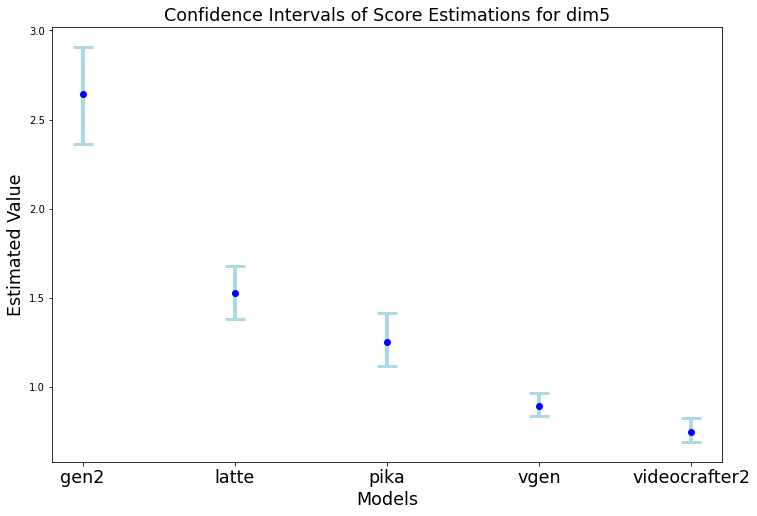

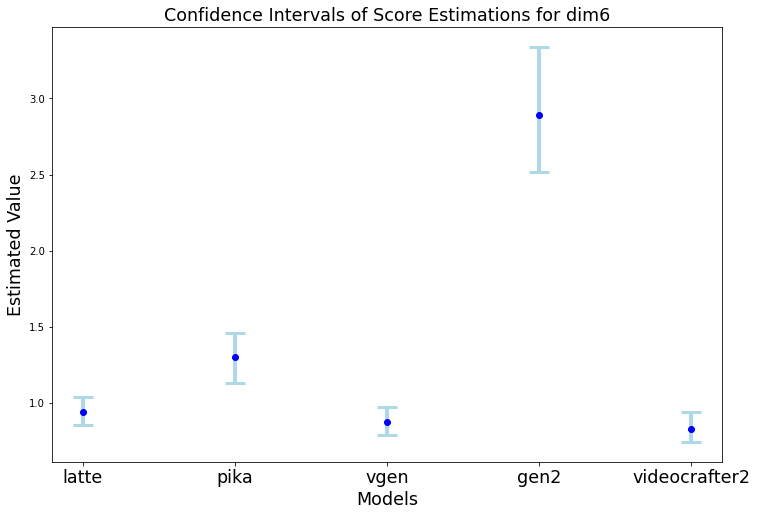

In [5]:
i = 1
for result in bs_results:
    fontsize = 17.5

    plt.figure(figsize=(12, 8))

    plt.errorbar(result.index, result['mean'], 
                yerr=[result['mean'] - result['lower'], 
                    result['upper'] - result['mean']],
                fmt='o', color='b', ecolor='lightblue', elinewidth=4, capsize=10, capthick=3)

    # plt.axhline(y=ref_edu_results.loc['Complete', 'mean'], color='r', linestyle='--', label='Complete Estimate')
    # plt.axhline(y=ref_edu_results.loc['Complete', 'lower'], color='orange', linestyle='--', label='Complete Lower CI')
    # plt.axhline(y=ref_edu_results.loc['Complete', 'upper'], color='orange', linestyle='--', label='Complete Upper CI')

    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel('Estimated Value', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.title('Confidence Intervals of Score Estimations for dim%d'%i, fontsize=fontsize)
    # plt.legend(fontsize=fontsize)
    #mkdir if not exist
    if not os.path.exists('figures'):
        os.makedirs('figures')
    plt.savefig('figures/bs_result_dim%d.png'%i)
    i += 1